# Project: Wrangling and Analyze Data

1. **Loading important libraries**

In [3]:
import pandas as pd
import numpy as np #perform mathematical operations
import requests
import tweepy     #This would enable us to conveniently access the Twitter API
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
from IPython.display import Image #Image Display
from functools import reduce
import re
import seaborn as sns
import datetime
from jupyterthemes import jtplot   #This is to customize the visual elements
jtplot.style(theme='onedork')

% matplotlib inline

In [2]:
!pip install jupyterthemes

### Gathering Data

#### 1. Manual Download of .csv File

In [4]:
#load the twitter-archive-enhanced.csv into a DataFrame and read
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(8)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None


#### 2. Gathering Data Programitcally Using  Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#Download tweet image predictions TSV and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [6]:
# Load the data in the image predictions file
df_image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image_predictions.head(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False


#### 3. Gathering Data through twitter API

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 7598

Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166:

Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440:

Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715:

Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [10]:
temp = []
import json 

with open('tweet_json.txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        url1 = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url1
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        temp.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

# create a new DataFrame 
df_new = pd.DataFrame(temp, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])
                                          
                                                           
df_new.head()

df_new.to_csv('tweet_json.txt', index=False)

In [7]:
tweet_json = pd.read_csv('tweet_json.txt')

## Assessing Our Data




* **Visual assessment**

In [9]:
#Read twitter-archive-enhanced.csv
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
tweet_json

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f
5,891087950875897856,20562,3261,Original tweet,https://t.co/kQ04fDDRmh
6,890971913173991426,12041,2158,Original tweet,https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,56848,16716,Original tweet,https://t.co/v0nONBcwxq
8,890609185150312448,28226,4429,Original tweet,https://t.co/9TwLuAGH0b
9,890240255349198849,32467,7711,Original tweet,https://t.co/t1bfwz5S2A


* **Programmatic assessment**

In [84]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [85]:
df_twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [19]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [86]:
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 204, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 143, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 666, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 1176, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [21]:
#print all the tex to know numerators and denominators
#17 dogs
print(df_twitter_archive['text'][1120]) 
#13 dogs
print(df_twitter_archive['text'][189]) 
#12 dogs
print(df_twitter_archive['text'][1779]) 
#This is just a tweet to explain actual ratings, this will be ignored when cleaning data
print(df_twitter_archive['text'][1634])
#This tweet has no picture, this will be ignored when cleaning data
print(df_twitter_archive['text'][313]) 



Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [25]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 16, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 15, 'text'])
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 11, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 2, 'text']) 
print(df_twitter_archive.loc[df_twitter_archive.rating_denominator == 7, 'text'])

1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [26]:
#tweet to explain rating
print(df_twitter_archive['text'][1663]) 
#no rating - delete
print(df_twitter_archive['text'][342]) 
#no rating - delete
print(df_twitter_archive['text'][516]) 
#retweet - it will be deleted when delete all retweets
print(df_twitter_archive['text'][784]) 
#actual rating 14/10 need to change manually
print(df_twitter_archive['text'][1068]) 
#actual rating 10/10 need to change manually
print(df_twitter_archive['text'][1662]) 
#actual rating 9/10 need to change manually
print(df_twitter_archive['text'][2335]) 


I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [27]:
df_twitter_archive['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
Sadie             8
the               8
an                7
Toby              7
Bailey            7
Buddy             7
Daisy             7
Milo              6
Oscar             6
Scout             6
Leo               6
Bella             6
Dave              6
Jax               6
Rusty             6
Stanley           6
Koda              6
Jack              6
Phil              5
               ... 
Devón             1
Danny             1
Rey               1
Samsom            1
River             1
Cleopatricia      1
Ruffles           1
Storkson          1
O                 1
Bloop             1
Mosby             1
Shikha            1
Frönq             1
Comet             1
Duchess           1
Gustaf            1
Perry             1
Mary              1
Kirk              1


In [28]:
df_twitter_archive[df_twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1057,714631576617938945,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg,1,meerkat,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True
160,668902994700836864,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,1,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,0.028004,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
1780,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True
279,671109016219725825,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg,1,basenji,0.855959,True,beagle,0.036723,True,toy_terrier,0.029258,True
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False


In [31]:
# This is an image for tweet_id 851591660324737024
Image(url = 'https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg')

In [32]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_image_predictions[df_image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [34]:
df_image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [40]:
df_image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Eskimo_dog                         27
Pembroke                           27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
malinois                           20
chow                               20
miniature_pinscher                 20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

* **Twitter Counts Dataframe Analysis**

In [87]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f


In [37]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
retweet_status    2354 non-null object
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [38]:
tweet_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


## Cleaning Data
 
 
### Tidiness 
1. Merge the clean versions of **df_image_predictions**, **df_twitter_archive**, and **tweet_json** dataframes.
2. Create one column for the different types of dog: floofer, pupper, doggo, puppo and Remove columns that are not needed: retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, and retweeted_status_timestamp, and in_reply_to_user_id.


* **Define:**
> Merge the clean versions of df_image_predictions, df_twitter_archive, and tweet_json dataframes

In [11]:
# Make copies of original pieces of data
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
tweet_json_clean = tweet_json.copy()

* **Code**

In [12]:
#Merging clean versions of df_image_predictions, df_twitter_archive, and tweet_json
archive_clean = pd.concat([df_twitter_archive_clean, df_image_predictions_clean, tweet_json_clean], join='outer', axis=1)

In [13]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,25461.0,4328.0,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,42908.0,8964.0,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,41048.0,9774.0,Original tweet,https://t.co/AtUZn91f7f


In [15]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'retweet_status', 'url'],
      dtype='object')

* **Test**

In [92]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 34 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
tweet_id                      20

#### Define:
>We need to creat a column for dog types: floofer, pupper, doggo, puppo

#### Code

In [14]:
#Now, we need to push the text into the just created dog_type colunn
archive_clean['dog_type'] = archive_clean['text'].str.extract('(pupper|doggo|floofer|puppo)')

#### Test

In [15]:
archive_clean[['dog_type', 'pupper', 'puppo', 'doggo', 'floofer']].sample(8)

,dog_type,pupper,puppo,doggo,floofer
352,pupper,pupper,None,None,None
792,NaN,None,None,None,None
980,NaN,None,None,None,None
1679,NaN,None,None,None,None
1198,NaN,None,None,None,None
831,NaN,None,None,None,None
840,NaN,None,None,None,None
1431,NaN,None,None,None,None


In [16]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'retweet_status', 'url', 'dog_type'],
      dtype='object')

In [17]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,39467.0,8853.0,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,33819.0,6514.0,Original tweet,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,bloodhound,0.116197,True,8.918152e+17,25461.0,4328.0,Original tweet,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,True,miniature_pinscher,0.222752,True,8.916896e+17,42908.0,8964.0,Original tweet,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,Doberman,0.154629,True,8.913276e+17,41048.0,9774.0,Original tweet,https://t.co/AtUZn91f7f,NaN


#### Define
> Deleting Retweets

#### Code

In [19]:
archive_clean = archive_clean[np.isnan(archive_clean.retweeted_status_id)]

In [20]:
#cheking for non-null
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 35 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
tweet_id                      1896 non

### Define
> Removing columns that are not relevants to our analysis

* **Code**

In [21]:
archive_clean = archive_clean.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [23]:
archive_clean = archive_clean.loc[:,~archive_clean.columns.duplicated()]

In [24]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'retweet_status', 'url', 'dog_type'],
      dtype='object')

In [25]:
archive_clean = archive_clean.drop(['retweet_status'], axis =1)

#### Test

In [26]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null object
p2                    

### Define
> Changing tweet_id from integer to a string

#### Code

In [28]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

### Test

In [29]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null object
p2                   

#### Correct misspelled names

In [30]:
archive_clean.name = archive_clean.name.str.replace('^[a-z]+', 'None')

In [31]:
archive_clean['name'].value_counts()

None        784
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Bella         6
Stanley       6
Oscar         6
Bo            6
Bailey        6
Jax           6
Koda          6
Dave          5
Milo          5
Rusty         5
Bentley       5
Leo           5
Louis         5
Chester       5
Buddy         5
Scout         5
Chip          4
Finn          4
           ... 
Lizzie        1
Shiloh        1
Kallie        1
Franq         1
Nollie        1
Geno          1
Gert          1
Shikha        1
Timison       1
Ronnie        1
Tilly         1
Randall       1
Hamrick       1
Andy          1
Jiminus       1
Socks         1
Tyrone        1
Ralphé        1
Stephan       1
Bungalo       1
Crawford      1
Willem        1
Roscoe        1
Canela        1
Dutch         1
Ashleigh      1
Mac           1
Zeek          1
Siba          1
Halo          1
Name: name, Length: 931,

### Changing the 'timestamp' column to a datetime object

### Code

In [32]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format = "%Y-%m-%d %H")

### Test

In [33]:
archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,url,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8853.0,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,6514.0,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,4328.0,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8964.0,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,9774.0,https://t.co/AtUZn91f7f,NaN


### Changing dog ratings to float data type

In [34]:
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)

In [35]:
archive_clean['rating_denominator'] = archive_clean['rating_denominator'].astype(float)

### Test

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 29 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null object
p2       

In [37]:
#performing  for loop on ratings, indices, and text for tweets that contain a decimal in the numerator 
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
ratings_decimals_text

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 "I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

### Test

In [116]:
ratings_decimals_index

[45, 340, 695, 763, 1689, 1712]

### Creating a new column using the image prediction data

### Code

In [39]:
#New column (Dog_type)
archive_clean['dog_type'] = 'None'

for i, row in archive_clean.iterrows():

    if row.p1_dog:
        archive_clean.set_value(i, 'dog_type', row.p1)
    elif row.p2_dog and row.rating_numerator >= 10:
        archive_clean.set_value(i, 'dog_type', row.p2)
    elif row.p3_dog and row.rating_numerator >= 10:
        archive_clean.set_value(i, 'dog_type', row.p3)
    else:
        archive_clean.set_value(i, 'dog_type', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


### Test

In [40]:
archive_clean.dog_type.value_counts()

None                          315
golden_retriever              160
Labrador_retriever             99
Chihuahua                      87
Pembroke                       83
pug                            62
toy_poodle                     48
chow                           47
Samoyed                        42
Pomeranian                     38
cocker_spaniel                 30
malamute                       30
Chesapeake_Bay_retriever       30
French_bulldog                 27
miniature_pinscher             25
Cardigan                       23
Staffordshire_bullterrier      21
Eskimo_dog                     20
German_shepherd                20
Siberian_husky                 19
beagle                         19
kuvasz                         18
Shih-Tzu                       16
Lakeland_terrier               16
Italian_greyhound              16
Rottweiler                     16
Maltese_dog                    16
basset                         16
Great_Pyrenees                 15
schipperke    

In [41]:
archive_clean.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,url,dog_type
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rudy. He's going to be a star. 13/10 t...,https://vine.co/v/irlDujgwOjd,13.0,10.0,Rudy,...,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True,2706.0,860.0,https://t.co/rSNCEiTtfI,Labrador_retriever
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,https://twitter.com/dog_rates/status/793165685...,12.0,10.0,Benji,...,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True,6909.0,1984.0,https://t.co/3lE8Izgmkf,toy_poodle
1632,684460069371654144,NaN,NaN,2016-01-05 19:42:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He's a Western Sagittarius Dookm...,https://twitter.com/dog_rates/status/684460069...,10.0,10.0,Jeph,...,American_Staffordshire_terrier,0.098313,True,Eskimo_dog,0.080188,True,1369.0,239.0,https://t.co/kRK51Y5ac3,Siberian_husky
591,799063482566066176,NaN,NaN,2016-11-17 01:35:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He only wears the most fashion...,https://twitter.com/dog_rates/status/799063482...,11.0,10.0,Mister,...,bull_mastiff,0.251530,True,bath_towel,0.116806,False,14712.0,5203.0,https://t.co/KJAKO2kXsL,pug
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,https://twitter.com/dog_rates/status/666099513...,8.0,10.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,121.0,47.0,https://t.co/3RU6x0vHB7,NaN
2292,667160273090932737,NaN,NaN,2015-11-19 01:59:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,https://twitter.com/dog_rates/status/667160273...,11.0,10.0,Bradlay,...,NaN,NaN,NaN,NaN,NaN,NaN,4851.0,2387.0,https://t.co/0DvHAMdA4V,NaN
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,https://twitter.com/dog_rates/status/832636094...,12.0,10.0,Orion,...,basset,0.009117,True,Italian_greyhound,0.007731,True,13126.0,2548.0,https://t.co/nqAJGCHKEt,beagle
413,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,...,Brabancon_griffon,0.082744,True,Chihuahua,0.045878,True,14576.0,2622.0,https://t.co/SSQE06XClS,pug
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",https://twitter.com/dog_rates/status/850753642...,11.0,10.0,Kyle,...,American_Staffordshire_terrier,0.305294,True,whippet,0.111686,True,13994.0,2915.0,https://t.co/FXZQtBcnTO,Italian_greyhound
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,https://vine.co/v/iOZKZEU2nHq,12.0,10.0,None,...,Persian_cat,0.122978,False,chow,0.102654,True,4536.0,2245.0,https://t.co/HSL3mnP5NX,Pomeranian


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
#Saving cleaned dataset to CSV file named "twitter_archive_master.csv".
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data


### Importing the cleaned master data

In [43]:
#Here is the code to import the clean dataset
We_Rate_Dogs = pd.read_csv('twitter_archive_master.csv')

In [44]:
We_Rate_Dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,url,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,...,collie,0.156665,True,Shetland_sheepdog,0.061428,True,39467.0,8853.0,https://t.co/MgUWQ76dJU,Welsh_springer_spaniel
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,...,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,33819.0,6514.0,https://t.co/0Xxu71qeIV,redbone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,...,malinois,0.138584,True,bloodhound,0.116197,True,25461.0,4328.0,https://t.co/wUnZnhtVJB,German_shepherd
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,42908.0,8964.0,https://t.co/tD36da7qLQ,Rhodesian_ridgeback
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,...,Rottweiler,0.243682,True,Doberman,0.154629,True,41048.0,9774.0,https://t.co/AtUZn91f7f,miniature_pinscher


In [45]:
We_Rate_Dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 29 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null float64
rating_denominator       2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
p1                       1896 non-null object
p1_conf                  1896 non-null float64
p1_dog                   1896 non-null object
p2                

### Insight 1
> Find the most popular Dog Type.

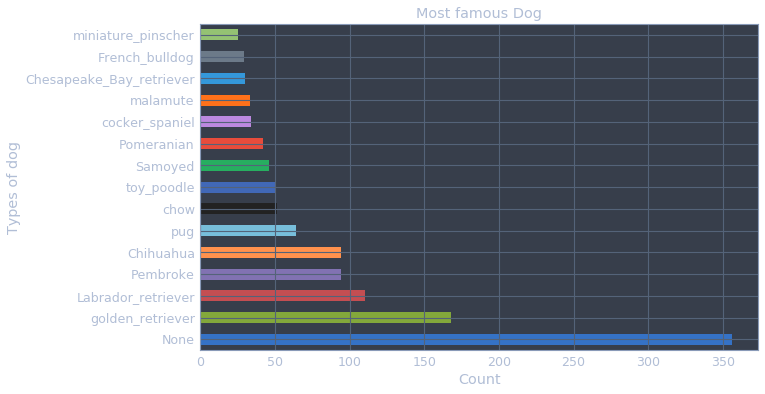

In [157]:
#Now, we need to filter using lambda function

dog_type = We_Rate_Dogs.groupby('dog_type').filter(lambda x: len(x) >= 10)


dog_type['dog_type'].value_counts().plot(kind = 'barh', figsize=(10,6))

plt.title('Most famous Dog')
plt.xlabel('Count')
plt.ylabel('Types of dog');

#### Observation :
* **The most popular dog type** (Breed) **is golden retriever, followed by labrador retriever**

### Insight 2
> Find and visualise the most popular Dog names.

In [14]:
We_Rate_Dogs.name.value_counts()

None         854
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
Buddy          7
Daisy          7
Toby           7
Bailey         7
Dave           6
Oscar          6
Koda           6
Rusty          6
Leo            6
Jack           6
Stanley        6
Scout          6
Milo           6
Jax            6
Bella          6
Oakley         5
Alfie          5
Louis          5
Sammy          5
            ... 
Blakely        1
Eazy           1
Mairi          1
Mauve          1
Clarq          1
Jackie         1
Amélie         1
Donny          1
Al             1
Rover          1
Akumi          1
Batdog         1
Dale           1
Boots          1
Coopson        1
Mason          1
Arnold         1
Spanky         1
Stephanus      1
Alf            1
Amy            1
Trigger        1
Miley          1
Ed             1
Georgie        1
Brownie        1
Tedrick        1
Lassie        

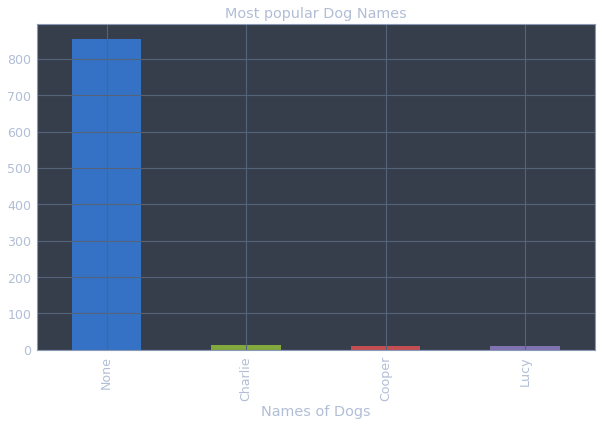

In [23]:
We_Rate_Dogs.name.value_counts()[0:4].plot('bar', figsize=(10,6), title='Most popular Dog Names').set_xlabel("Names of Dogs");

#### Observation :
* **The most popular dogs are Charlie, Oliver, and Cooper**

### Insight 3
> Find the correlation between Retweet and Favorite.

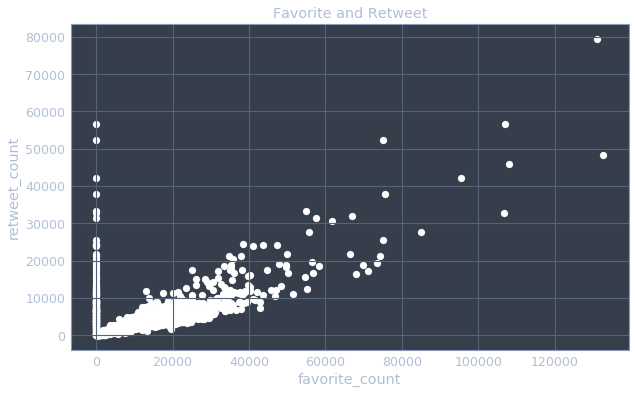

In [13]:
We_Rate_Dogs.plot(x='favorite_count', y='retweet_count', kind='scatter', s=50, figsize=(10,6), color= 'white', title = 'Favorite and Retweet')
plt.show()

In [188]:
We_Rate_Dogs['favorite_count'].corr(We_Rate_Dogs['retweet_count'])

0.6540032164841999

#### Observation :
* *The above scatter plot shows that there is a positive correlation between favorite and Retweet.*

